# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

### Academic honesty statement

**Camila Cue**

Place your academic honesty statement below. Here are some acceptable examples.

-   I worked alone on this assignment.




# Problem 1: Gas Laws



The virial equation for a gas can be represented as $\frac{PV}{RT} = 1 + \frac{B}{V} + \frac{C}{V^2}$ where $V$ is the molar volume.

For isopropanol $B=-388 cm^3/mol$ and $C=-26,000 cm^6/mol^2$.

We are going to find $V$ for isopropanol at 200 ∘C and 10 bar with a graphical technique.

In this problem $R=83.14 cm^3 bar / (mol K)$.



### Compute V for an ideal gas



The ideal gas law is $1 = \frac{PV}{RT}$. Use this to estimate the volume of isopropanol in the ideal gas state. Print your answer with one decimal place and the printed answer **must include units.**



In [1]:
P = 10 # bar
T = 200 + 273.15 # K
R = 83.14 # cm^3 bar/(molK)

V = (R*T)/P # cm^3/mol

print(f'Ideal Gas Volume = {V:0.1f} cm\u00b3/mol')

Ideal Gas Volume = 3933.8 cm³/mol


### Compute V for the Virial Gas Law



To do this, create a new function:

$f(V) = \frac{PV}{RT} - 1 - \frac{B}{V} - \frac{C}{V^2} = 0$

and then find values of $V$ where $f(V) = 0$. Start by defining this function and test that it works.Show that your function works by evaluating it for some examples, including an array of volumes.



In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
P = 10 # bar
T = 200 + 273.15 # K
R = 83.14 # cm^3 bar/(molK)
V = np.array([3480,3485,3490,3495,3500,3505,3510])

def f(V):
    B = -388 # cm^3/mol
    C = -26000 #cm^6/mol^2
    F = (P*V/(R*T))-1-(B/V)-(C/V**2)
    return F

print(f(V))

[-0.00171108 -0.00060615  0.00049926  0.00160515  0.00271153  0.00381838
  0.00492571]


### Plot f(V) over a range where you can observe a zero



You should make the x-axis sufficiently zoomed in to estimate the solution to about 10 cm<sup>3</sup>.



Text(0,0.5,'f(V)')

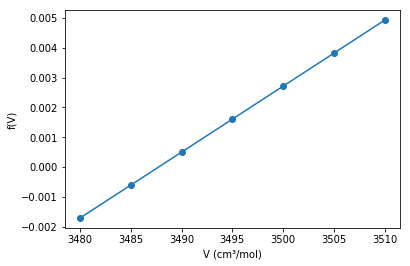

In [3]:
plt.plot(V,f(V),"o-")
plt.xlabel ('V (cm\u00b3/mol)')
plt.ylabel('f(V)')

##### The solution(s) are between the molar volumes:
3,485 $cm^3/mol$ and 3,490 $cm^3/mol$.


### Express this in the form of a cubic polynomial in $V$



Derive an alternative expression for f(V) where it is a cubic polynomial of the form $0 = a V^3 + b V^2 + c V + d$. Write this expression in LaTeX, with explicit definitions for the coefficients.



$f(V) = \frac{-PV}{RT}V^3 + V^2 + BV + C = 0$ 

$a = \frac{-PV}{RT}$\
$b = 1$\
$c = B$\
$d = C$

# Problem 2: Running and plotting an ODE

Most programming is repeative. Once you learn how to run an ODE solver, running it again in the future involves just editing prior code. We discussed the Lorenz equations in class, now we'll run them ourselves. The equations are as follows: 

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

These equations are to describe a 2 dimensional layer of fluid that is heat from below and cooled from above. The derivation of these equations is beyond our interest here but can be found easily online. We want to focus on how to simulate such equations.

In the above, x is proportional to the intensity of the convective motion, while y is proportional to the temperature difference between the ascending and descending currents, similar signs of x and y denoting that warm fluid is rising and cold fluid is descending. The variable z is proportional to the distortion of vertical temperature profile from linearity, a positive value indicating that the strongest gradients occur near the boundaries.

Let the parameters be
\begin{align}
\sigma =10\\
\beta =8/3\\
\rho =28\\
\end{align}

We will ignore units for this problem.

In the space below, 
1. Simulate this system with initial conditions of x = y = z = 1. Simulate out to time 1000 and take 0.1 time unit step sizes. Save the necessary results in a matrix.


In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline 

from scipy.integrate import odeint

#Define the function of Part 1
def lorenz1(x1, y1, z1, sigma=10, beta=8/3, rho=28):
    dxdt1 = sigma*(y1 - x1)
    dydt1 = rho*x1 - y1 - x1*z1
    dzdt1 = -beta*z1 + x1*y1
    return dxdt1, dydt1, dzdt1

# Set time
dt1 = 0.01
num_steps1 = 10000

# Initial values
x01 = np.empty(num_steps1 + 1)
y01 = np.empty(num_steps1 + 1)
z01 = np.empty(num_steps1 + 1)

x01[0], y01[0], z01[0] = (1.0, 1.0, 1.0)

# Evaluating at each time point
for i in range(num_steps1):
    dxdt1, dydt1, dzdt1 = lorenz1(x01[i], y01[i], z01[i])
    x01[i+1] = x01[i] + (dxdt1*dt1)
    y01[i+1] = y01[i] + (dydt1*dt1)
    z01[i+1] = z01[i] + (dzdt1*dt1)


2. Simulate the system again but with x = y = 1 and z = 0.9999 (precisely). Save the necessary results in a matrix.

In [5]:
#Define the function of Part 2
def lorenz2(x2, y2, z2, sigma=10, beta=8/3, rho=28):
    dxdt2 = sigma*(y2 - x2)
    dydt2 = rho*x2 - y2 - x2*z2
    dzdt2 = -beta*z2 + x2*y2
    return dxdt2, dydt2, dzdt2

# Set time
dt2 = 0.01
num_steps2 = 10000

# Initial values
x02 = np.empty(num_steps2 + 1)
y02 = np.empty(num_steps2 + 1)
z02 = np.empty(num_steps2 + 1)

x02[0], y02[0], z02[0] = (1.0, 1.0, 0.9999)

# Evaluating at each time point
for i in range(num_steps2):
    dxdt2, dydt2, dzdt2 = lorenz2(x02[i], y02[i], z02[i])
    x02[i+1] = x02[i] + (dxdt2*dt2)
    y02[i+1] = y02[i] + (dydt2*dt2)
    z02[i+1] = z02[i] + (dzdt2*dt2)


3. On a single plot, plot x vs y from 1 and 2 above. Be sure to label axes.

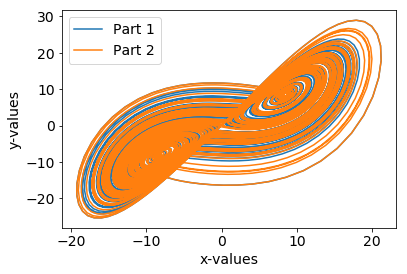

In [6]:
# Plot 
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.plot(x01, y01, label = 'Part 1')
plt.plot(x02, y02, label = 'Part 2')
plt.legend()

4. On a single plot, plot x vs z from 1 and 2 above. Be sure to label axes.

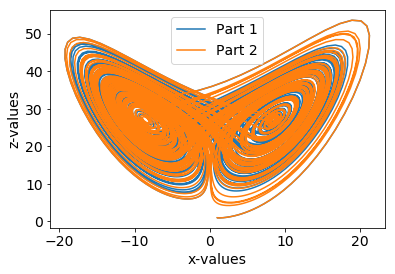

In [7]:
# Plot 
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x-values")
plt.ylabel("z-values")
plt.plot(x01, z01, label = 'Part 1')
plt.plot(x02, z02, label = 'Part 2')
plt.legend()

5. On a single plot, plot x vs time from 1 and 2 above. Be sure to label.

In [8]:
# To plot x vs t

# Define the first function.
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

from scipy.integrate import odeint

#Define the function of Part 1
def lorenzt1(xt1yt1zt1, t=0, sigma=10, beta=8/3, rho=28):
    xt1,yt1,zt1 = xt1yt1zt1
    dxtdt1 = sigma*(yt1 - xt1)
    dytdt1 = rho*xt1 - yt1 - xt1*zt1
    dztdt1 = -beta*zt1 + xt1*yt1
    return dxtdt1, dytdt1, dztdt1

# Set time series
ts1 = np.linspace(0, 1000, 10000)

# Solve
sol1 = odeint(lorenzt1, [1.0,1.0,1.0], ts1)

xs1,ys1,zs1 = sol1.T


In [9]:
# Define the second function.
def lorenzt2(xt2yt2zt2, t=0, sigma=10, beta=8/3, rho=28):
    xt2,yt2,zt2 = xt2yt2zt2
    dxtdt2 = sigma*(yt2 - xt2)
    dytdt2 = rho*xt2 - yt2 - xt2*zt2
    dztdt2 = -beta*zt2 + xt2*yt2
    return dxtdt2, dytdt2, dztdt2

# Set time series
ts2 = np.linspace(0, 1000, 10000)

# Solve
sol2 = odeint(lorenzt2, [1.0,1.0,0.9999], ts2)

xs2,ys2,zs2 = sol2.T

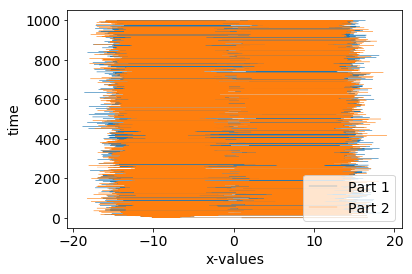

In [10]:
# Plot x vs t

plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x-values")
plt.ylabel("time")
plt.plot(xs1, ts1, linewidth=0.3, label = 'Part 1')
plt.plot(xs2, ts2, linewidth=0.3, label = 'Part 2')
plt.legend()

6. After completing all simulations, comment on how changing the initial value of z by 0.01% impacted the simulation outcomes. Be sure to use a Markdown cell for this.

**Write your answer here.**

#### By changing the initial value of z by 0.001% changed completely the simulation outcomes, meaning that the results are extremely sensitive to the initial values chosen. Such a small change in the initial value, resulted in a huge change in the final values.

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [11]:
%matplotlib inline 

import numpy as np
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
import csv

headers = ['week', 'cases_avg', 'death_avg']
dat = pd.read_csv('florida.csv')
#dat = np.loadtxt(r'florida.csv')
#dat = np.genfromtxt('florida.csv')
print (dat)

     week  cases_avg  deaths_avg
0       1       0.29        0.00
1       2       0.29        0.00
2       3       0.43        0.00
3       4       0.43        0.00
4       5       0.57        0.00
..    ...        ...         ...
536   537   23792.86      201.29
537   538   21534.29      212.29
538   539   23313.86      212.29
539   540   23313.86      212.29
540   541   21329.14      227.57

[541 rows x 3 columns]


Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2. After plotting, create a markdown cell and comment on the how these two features have evolved in time.

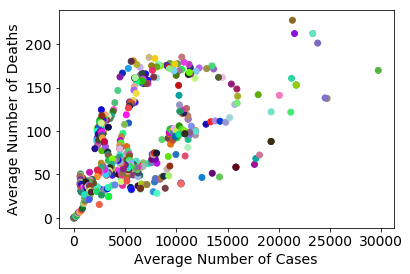

In [13]:
# Plot 
import matplotlib.cm as cm
import itertools

z = dat.loc[:,"week"]
x = dat.loc[:,"cases_avg"]
y = dat.loc[:,"deaths_avg"]


plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("Average Number of Cases")
plt.ylabel("Average Number of Deaths")

plt.scatter(dat.loc[:,"cases_avg"], dat.loc[:,"deaths_avg"], c=np.random.rand(len(z),3))



#### The plot above has a different color for each week. Below I graphted the same data points but changing the colors every couple of weeks to have a better understading on how the two features evolved during time.

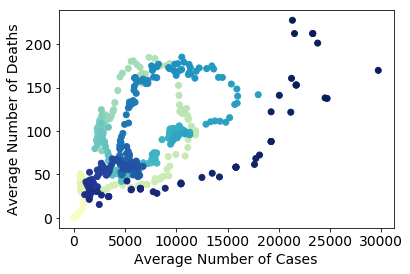

In [14]:
# Plot 
import matplotlib.cm as cm
import itertools

z = dat.loc[:,"week"]
x = dat.loc[:,"cases_avg"]
y = dat.loc[:,"deaths_avg"]


plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("Average Number of Cases")
plt.ylabel("Average Number of Deaths")

plt.scatter(dat.loc[:,"cases_avg"], dat.loc[:,"deaths_avg"], c=dat.loc[:,"week"], cmap="YlGnBu")


**Put Commentary here:**
##### From the data above it can be seen that the two feautures, Average Number of Cases and Average Number of Deaths, does not have a clear pattern and neither are consistent regarding the time (Weekly). Both at some time points are seen to be at a very high number, but after some time it starts to decrease. This continues to happen as time progresses until approximately the last 10 weeks were both of the datas recorded are at their highest.

One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Right a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


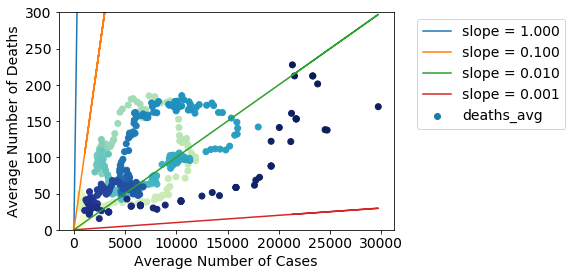

In [15]:
# Plot 
import matplotlib.cm as cm
import itertools

z = dat.loc[:,"week"]
x = dat.loc[:,"cases_avg"]
y = dat.loc[:,"deaths_avg"]


plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("Average Number of Cases")
plt.ylabel("Average Number of Deaths")
#

plt.scatter(dat.loc[:,"cases_avg"], dat.loc[:,"deaths_avg"], c=dat.loc[:,"week"], cmap="YlGnBu")

for i in range(4):
    m = 1*10**(-i)
    y = m*x
    plt.plot(x,y, label='slope = %.3f'%m)

plt.ylim(0,300)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

#### The straight line with a slope of 0.010 is that best fit for the plotted data. The best fitted expresses the relationship in the data collected of the average number of deaths due to covid depending on the average number of covid cases recorded.

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here:


**Upload your jupyter notebook to Canvas for grading. Thank you!